<a href="https://colab.research.google.com/github/igor-puzipe/Vacinacao_polio_brasil/blob/main/Notebook/vacinacao_polio_analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vacinação da Poliomielite no Brasil

Neste repositório será analisado dados de vacinação de pólio no Brasil, com foco na região Norte do país

# Introdução

O  motivo de estar analisando em específico a taxa de vacinação de pólio no Brasil, são as notícias mais recentes que alguns sites publicaram, de que a taxa de vacinação vem caíndo nos últimos anos e de que estamos suscetíveis ao retorno da doença no páis. https://valorinveste.globo.com/mercados/brasil-e-politica/noticia/2021/11/16/queda-na-vacinacao-coloca-brasil-em-lista-de-alto-risco-para-a-polio.ghtml

Analisaremos a região norte do país, para compararmos com a pesquisa de Barbosa (2021), que faz uma análise profunda sobre tais taxas de vacinação, onde o foco de sua pesquisa foi o norte do páis.

In [1]:
#Importando bibliotecas

engine='python'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import colors as mcolors

In [2]:
#Tratamento inicial do banco (decimais, tipo de arquivo, separadores e linhas inutilizadas)

cv_polio = pd.read_csv("https://raw.githubusercontent.com/igor-puzipe/Vacinacao_polio_brasil/main/Dados/cv_polio_ano.csv", encoding="ISO-8859-1", 
                    skiprows=4, sep=";", skipfooter=20,
                    thousands=".", decimal=",")
dados_pop = pd.read_csv("https://raw.githubusercontent.com/igor-puzipe/Vacinacao_polio_brasil/main/Dados/pop_infantil_0a4_anos.csv", encoding="ISO-8859-1", 
                    skiprows=5, sep=";", skipfooter=4,
                     thousands=".", decimal=",")

pd.options.display.float_format="{:.2f}".format

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [3]:
#Retirando a numeração na frente dos nomes dos estados e definindo estados como a coluna principal

cv_polio["uf"] = cv_polio["Unidade da Federação"].str.slice(start=3)
cv_polio = cv_polio.set_index("uf").drop("Unidade da Federação", axis=1) #drop unidade da federação remove a duplicação de estado que a linha de código gera
cv_polio = cv_polio.drop("Total", axis=1) #retirando a coluna total
cv_norte = cv_polio.T #rotaciona a tabela para filtro de colunas
cv_norte= cv_norte[["Roraima", "Acre", "Amapá", "Amazonas", "Pará", "Rondônia", "Tocantins"]]
dados_pop["uf"] = dados_pop["Unidade da Federação"].str.slice(start=3) #função modifica a linha 'total' para 'al'
dados_pop = dados_pop.set_index("uf").drop("al", axis=0) #remover 'al' é o mesmo que remover a coluna 'total'
dados_pop = dados_pop.drop("Unidade da Federação", axis=1)
pop_norte = dados_pop.T
pop_norte= pop_norte[["Roraima", "Acre", "Amapá", "Amazonas", "Pará", "Rondônia", "Tocantins"]]
pop_sp=dados_pop.T
pop_sp=pop_sp[["São Paulo"]]
cv_sp=cv_polio.T
cv_sp=cv_sp[["São Paulo"]]

# Dados
Os dados utilizados no projeto estão divididos em dois arquivos, um deles com informções da população infantil diponível para tomar a vacina da poliomielite, o outro arquivo contém os dados de cobertura de vacinação da poliomielite no país.
Ambos representam o histórico de 10 anos, tanto de vacinação, quanto de população infantil.

# População infantil de 0 a 4 anos, dados fornecidos pelo TabNet

O motivo de utilizar os dados da população infantil é que a vacina da poliomielite é aplicada a crianças de 2 meses até menores de 5 anos, portanto, a faixa de idade selecionada é a população disponível para tomar a vacina.

In [4]:
pop_norte

uf,Roraima,Acre,Amapá,Amazonas,Pará,Rondônia,Tocantins
2010,50711,90458,79189,401044,797433,136436,131747
2011,51445,88578,79467,400499,782470,134343,129395
2012,51852,87495,79276,401135,766883,133371,127957
2013,52087,85792,79232,402072,750588,133100,126607
2014,52447,84870,79398,404171,739204,133760,125667
2015,52931,85420,79722,408138,734749,135292,125808
2016,53503,84882,80137,409533,727703,136504,124837
2017,54616,83850,80866,408846,722199,137670,124055
2018,56192,83908,81129,408742,722380,139155,124911
2019,57800,83568,80698,406547,720553,139897,125433


# Cobertura de vacinas da Poliomielite no Norte do País
Como uma das fontes de estudo se trata de um artigo referente a região norte do país, serão utilizados apenas tais estados.

In [5]:
cv_norte

uf,Roraima,Acre,Amapá,Amazonas,Pará,Rondônia,Tocantins
2010,9318,17536,12974,69942,147442,26389,24213
2011,9203,18717,12092,65908,144821,27986,24813
2012,8554,16194,13248,69525,139453,27559,23101
2013,8543,16509,14101,73694,137661,27664,24278
2014,9490,12585,12007,76499,116248,28654,22076
2015,12131,14078,14489,82643,100218,28514,23434
2016,9820,12167,7721,61556,90485,29049,21142
2017,9716,12612,10364,61601,96257,29923,21431
2018,9089,12207,10650,60189,93892,27046,21697
2019,6132,8156,7219,42999,59386,15704,14698


#Relação vacina/pessoa para região norte

In [6]:
vac_pessoa_norte=cv_norte/pop_norte
vac_pessoa_sp=cv_sp/pop_sp

In [7]:
vac_pessoa_norte

uf,Roraima,Acre,Amapá,Amazonas,Pará,Rondônia,Tocantins
2010,0.18,0.19,0.16,0.17,0.18,0.19,0.18
2011,0.18,0.21,0.15,0.16,0.19,0.21,0.19
2012,0.16,0.19,0.17,0.17,0.18,0.21,0.18
2013,0.16,0.19,0.18,0.18,0.18,0.21,0.19
2014,0.18,0.15,0.15,0.19,0.16,0.21,0.18
2015,0.23,0.16,0.18,0.20,0.14,0.21,0.19
2016,0.18,0.14,0.10,0.15,0.12,0.21,0.17
2017,0.18,0.15,0.13,0.15,0.13,0.22,0.17
2018,0.16,0.15,0.13,0.15,0.13,0.19,0.17
2019,0.11,0.10,0.09,0.11,0.08,0.11,0.12


Será análisado também como está se comportando a taxa de vacinação em sp, visto que a densidade populacional na grande metrópole pode divergir da situação no norte do país

In [8]:
vac_pessoa_sp

uf,São Paulo
2010,0.19
2011,0.20
2012,0.19
2013,0.20
2014,0.20
2015,0.20
2016,0.17
2017,0.18
2018,0.18
2019,0.10


# Análises das relações

Através deste gráfico é possível observar a queda de todos os estados até 2019, mesmo que sejam menores para os estados com menor população, todos possuem uma queda a partir de 2018

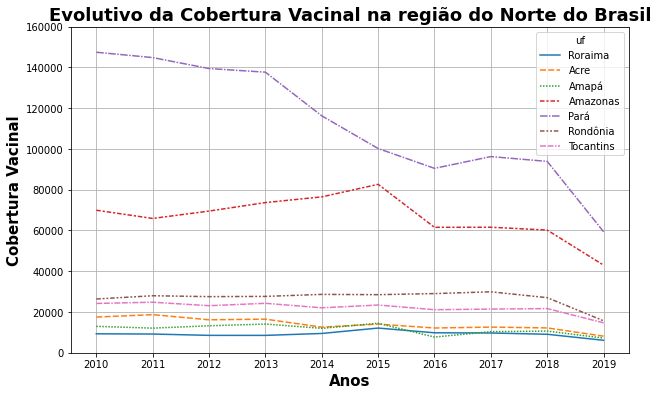

In [12]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=cv_norte)
plt.xticks(rotation=0)
plt.ylim(0, 160000)
ax.set_title('Evolutivo da Cobertura Vacinal na região do Norte do Brasil', fontsize=18, fontstyle='normal',fontweight=700)
ax.set_ylabel('Cobertura Vacinal', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
plt.grid(linestyle='-')
plt.show()

# Análise das taxas de vacinação

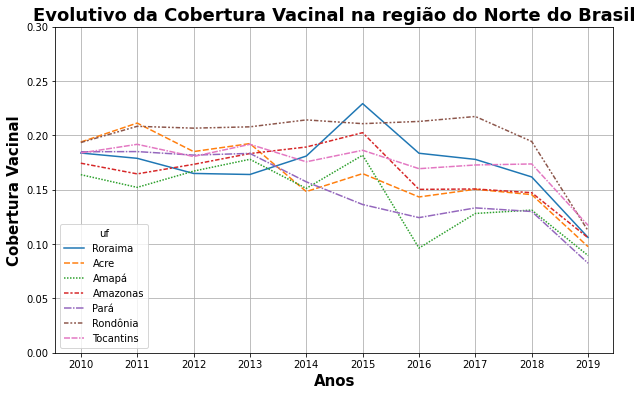

In [29]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=vac_pessoa_norte)
plt.xticks(rotation=0)
plt.ylim(0, 0.3)
ax.set_title('Vacinas por pessoa na região do Norte do Brasil', fontsize=18, fontstyle='normal',fontweight=700)
ax.set_ylabel('Taxa de vacinação', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
plt.grid(linestyle='-')
plt.show()


Ao observar as taxas de vacinação por habitante disponível para tomar a vacina, concluímos que independente se a população diposnível diminui não é relevante pois a queda existe na relação vacinaXpessoa.
Para melhorar a análise, podemos comparar com o estado de São Paulo, que possui uma densidade bem maior de habitantes.

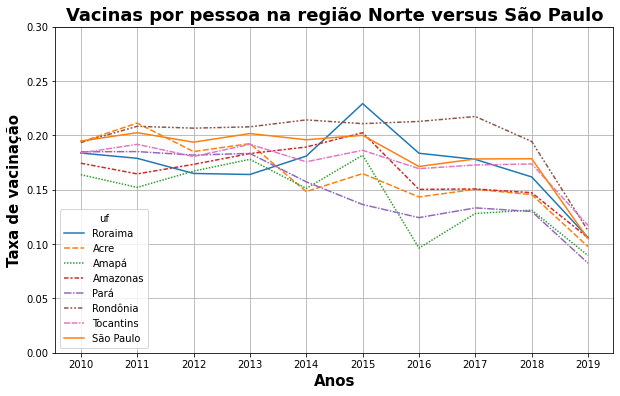

In [32]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=vac_pessoa_norte)
vac_pessoa_sp.plot(ax=ax)
plt.xticks(rotation=0)
plt.ylim(0, 0.3)
ax.set_title('Vacinas por pessoa na região Norte versus São Paulo', fontsize=18, fontstyle='normal',fontweight=700)
ax.set_ylabel('Taxa de vacinação', fontsize=15, fontweight=600)
ax.set_xlabel('Anos', fontsize=15, fontweight=600)
plt.grid(linestyle='-')
plt.show()


A análise de Barbosa (2021), indica uma grande queda na taxa de vacinação infantil de pólio no norte do país, onde supostamente estamos mais expostos a poliomielites selvagens (possibilidade de virem da natureza), porém a queda é facilmente observada em São Paulo.

# Conclusão

Apesar de possuirmos tais quedas vacinais, a população de 2010 possuía uma imunidade para a doença muito superior a que existe hoje, o maior perigo enfrentado é em relação a países que não erradicaram a doença e poderiam estar disseminando a doença novamente no país. A questão exterior não seria um problema com mais que 95% da população imunizada, porém, com a queda de vacinação isso se torna preocupante e é indicado que as fronteiras externas com países que possuem a doença sejam um pouco mais rígidas.
O risco em si é baixo, contudo, é necessário tomar precauções e concientização da vacinação.

# Referencias Bibliográficas

BARBOSA, Camila Leal et al. Cobertura vacinal para Poliomielite na Amazônia brasileira e os riscos à reintrodução do poliovírus. Research, Society and Development, v. 10, n. 7, p. e42810716768-e42810716768, 2021.